<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集" data-toc-modified-id="数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集</a></span></li><li><span><a href="#数据集划分：-训练集和测试集" data-toc-modified-id="数据集划分：-训练集和测试集-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据集划分： 训练集和测试集</a></span></li><li><span><a href="#模型训练:-训练集训练+测试集测试" data-toc-modified-id="模型训练:-训练集训练+测试集测试-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型训练: 训练集训练+测试集测试</a></span></li><li><span><a href="#模型训练：训练过程评估验证集结果" data-toc-modified-id="模型训练：训练过程评估验证集结果-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>模型训练：训练过程评估验证集结果</a></span></li><li><span><a href="#模型训练：训练过程评估验证集结果并加入early_stop" data-toc-modified-id="模型训练：训练过程评估验证集结果并加入early_stop-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模型训练：训练过程评估验证集结果并加入early_stop</a></span></li><li><span><a href="#输出特征重要性" data-toc-modified-id="输出特征重要性-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>输出特征重要性</a></span></li><li><span><a href="#调参" data-toc-modified-id="调参-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>调参</a></span><ul class="toc-item"><li><span><a href="#学习率" data-toc-modified-id="学习率-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>学习率</a></span></li><li><span><a href="#subsample" data-toc-modified-id="subsample-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>subsample</a></span></li></ul></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>参考资料</a></span></li></ul></div>

通过一个简单的分类问题学习XGBOOST的使用和相关参数设置。分类问题为判断一个病人在5年内是否患糖尿病。

## 数据集

使用的数据集是pima-indians-diabetes，该数据集前8列为属性，最后一列为标签。数据集从[码云](https://gitee.com/biabianm/pima-indians-diabetes/blob/master/pima-indians-diabetes.csv)下载。

In [1]:
import pandas as pd

In [2]:
data_dir = '../../../../Workspace/text_resources/datasets/pima-indians-diabetes.csv'

In [6]:
data_df = pd.read_csv(data_dir)
data_df.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

pregnants = Number of times pregnant

Plasma_glucose_concentration = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_pressure = Diastolic blood pressure (mm Hg)

Triceps_skin_fold_thickness = Triceps skin fold thickness (mm)

serum_insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

Diabetes_pedigree_function = Diabetes pedigree function

Age = Age (years)

Target = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 数据集划分： 训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split

In [18]:
X = data_df.iloc[:, 0:8]
y = data_df.iloc[:, 8]

In [19]:
import time

In [21]:
train_size = 0.7
seed = int(time.time())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed)

## 模型训练: 训练集训练+测试集测试

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [23]:
# 默认值
# n_estimators：100 树个数
# max_depth： 3 树深度
# learning_rate： 0.1 学习率
# objective： logloss 目标函数
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [32]:
acc = accuracy_score(y_test, y_pred)
acc

0.7489177489177489

In [36]:
f1 = f1_score(y_test, y_pred)
f1

0.6419753086419754

## 模型训练：训练过程评估验证集结果

In [37]:
eval_set = [(X_test, y_test)]
model = XGBClassifier()
# 只给定验证集时：
# + 还是会训练完100课树，并且使用error作为评估准则
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-error:0.290043
[1]	validation_0-error:0.285714
[2]	validation_0-error:0.255411
[3]	validation_0-error:0.255411
[4]	validation_0-error:0.255411
[5]	validation_0-error:0.264069
[6]	validation_0-error:0.25974
[7]	validation_0-error:0.264069
[8]	validation_0-error:0.268398
[9]	validation_0-error:0.264069
[10]	validation_0-error:0.268398
[11]	validation_0-error:0.25974
[12]	validation_0-error:0.264069
[13]	validation_0-error:0.251082
[14]	validation_0-error:0.251082
[15]	validation_0-error:0.251082
[16]	validation_0-error:0.242424
[17]	validation_0-error:0.242424
[18]	validation_0-error:0.251082
[19]	validation_0-error:0.242424
[20]	validation_0-error:0.233766
[21]	validation_0-error:0.233766
[22]	validation_0-error:0.238095
[23]	validation_0-error:0.238095
[24]	validation_0-error:0.242424
[25]	validation_0-error:0.238095
[26]	validation_0-error:0.238095
[27]	validation_0-error:0.242424
[28]	validation_0-error:0.242424
[29]	validation_0-error:0.238095
[30]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

从上述的结果可以观察到，当只指定验证集的还是模型还是训练够了100课树。此外，还可以发现这个过程中虽然error在中间某个时间达到最低值，模型还是继续训练，导致最终的结果并不是最优的。

In [42]:
eval_set = [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, y_train, eval_set=eval_set, eval_metric="logloss")

[0]	validation_0-logloss:0.661799
[1]	validation_0-logloss:0.638594
[2]	validation_0-logloss:0.614165
[3]	validation_0-logloss:0.596266
[4]	validation_0-logloss:0.581508
[5]	validation_0-logloss:0.569146
[6]	validation_0-logloss:0.555601
[7]	validation_0-logloss:0.548347
[8]	validation_0-logloss:0.5407
[9]	validation_0-logloss:0.533629
[10]	validation_0-logloss:0.527112
[11]	validation_0-logloss:0.523614
[12]	validation_0-logloss:0.518502
[13]	validation_0-logloss:0.515161
[14]	validation_0-logloss:0.512742
[15]	validation_0-logloss:0.512369
[16]	validation_0-logloss:0.509281
[17]	validation_0-logloss:0.505474
[18]	validation_0-logloss:0.504088
[19]	validation_0-logloss:0.503247
[20]	validation_0-logloss:0.501015
[21]	validation_0-logloss:0.498152
[22]	validation_0-logloss:0.497204
[23]	validation_0-logloss:0.496385
[24]	validation_0-logloss:0.496324
[25]	validation_0-logloss:0.493388
[26]	validation_0-logloss:0.493843
[27]	validation_0-logloss:0.492685
[28]	validation_0-logloss:0.4941

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 模型训练：训练过程评估验证集结果并加入early_stop

In [43]:
eval_set = [(X_test, y_test)]
model = XGBClassifier()
# 指定early_stopping_rounds让模型可以提前停止训练
# 这个参数要求模型在early_stopping_rounds这么多次训练中的error值都要不断下降
model.fit(X_train, y_train, eval_set=eval_set, eval_metric="logloss", early_stopping_rounds=5)

[0]	validation_0-logloss:0.661799
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.638594
[2]	validation_0-logloss:0.614165
[3]	validation_0-logloss:0.596266
[4]	validation_0-logloss:0.581508
[5]	validation_0-logloss:0.569146
[6]	validation_0-logloss:0.555601
[7]	validation_0-logloss:0.548347
[8]	validation_0-logloss:0.5407
[9]	validation_0-logloss:0.533629
[10]	validation_0-logloss:0.527112
[11]	validation_0-logloss:0.523614
[12]	validation_0-logloss:0.518502
[13]	validation_0-logloss:0.515161
[14]	validation_0-logloss:0.512742
[15]	validation_0-logloss:0.512369
[16]	validation_0-logloss:0.509281
[17]	validation_0-logloss:0.505474
[18]	validation_0-logloss:0.504088
[19]	validation_0-logloss:0.503247
[20]	validation_0-logloss:0.501015
[21]	validation_0-logloss:0.498152
[22]	validation_0-logloss:0.497204
[23]	validation_0-logloss:0.496385
[24]	validation_0-logloss:0.496324
[25]	validation_0-logloss:0.493388
[26]	validation_0-logloss:0.493843


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

可以看到当模型发现logloss值不下降之后，就会提前停止训练，并且输出最优的结果。

## 输出特征重要性

In [44]:
from xgboost import plot_importance

In [45]:
%matplotlib inline

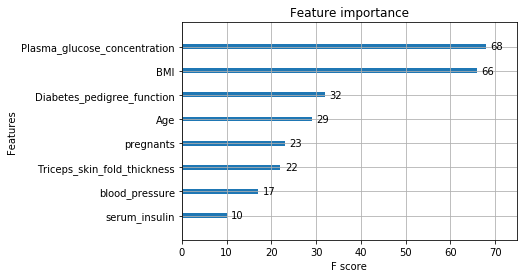

In [46]:
plot_importance(model)

## 调参

XGBOOST中可以调节的参数包括（括号中的为默认值）：
+ learning_rate(0.1): 学习率，学习率越小说明每次走的长度越小，因此需要更多的树
+ n_estimators(100): 树的个数🌲
+ max_depth(3): 树的深度🌲
+ colsample_bytree(1): 当创建每一棵树的时候，只使用其中的部分属性
+ colsample_bylevel(1): 树的每一层只使用其中的部分属性
+ colsamole_bynode(1): 分裂每个节点的时候，只使用其中的部分属性
+ subsample(1): 只使用部分训练样本

`colsample_bytree, colsample_bylevel, colsamole_bynode, subsample`参考了随机森林的方法，用于防止过拟合。

### 学习率

下面以学习率为例，通过网格搜索的方法寻找最优参数。

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [49]:
model = XGBClassifier()
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param = dict(learning_rate=learning_rates)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=int(time.time()))
grid_search = GridSearchCV(model, param_grid=param, scoring="neg_log_loss", cv=kfold)
ret = grid_search.fit(X, y)

In [51]:
# 获取最优参数和对应的结果
ret.best_score_, ret.best_params_

(-0.48532649107437464, {'learning_rate': 0.1})

In [57]:
# 获取每个参数在10折测试中对应结果的均值和方
means = ret.cv_results_["mean_test_score"]
stds = ret.cv_results_["std_test_score"]
params = ret.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print(mean, std, param)

-0.6897171731106937 0.00040455031056076216 {'learning_rate': 0.0001}
-0.6613499955274165 0.0035903914452080723 {'learning_rate': 0.001}
-0.530141705297865 0.02040763047156933 {'learning_rate': 0.01}
-0.48532649107437464 0.04189947381838934 {'learning_rate': 0.1}
-0.5348682376841983 0.05535405809252925 {'learning_rate': 0.2}
-0.5649503417167333 0.06831279591078589 {'learning_rate': 0.3}


### subsample

In [58]:
model = XGBClassifier()
subsample_ratio = [1, 0.9, 0.8, 0.7]
colsample_bytree_ratio = [1, 0.9, 0.8, 0.7]
param = dict(subsample=subsample_ratio, colsample_bytree=colsample_bytree_ratio)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=int(time.time()))
grid_search = GridSearchCV(model, param_grid=param, scoring="neg_log_loss", cv=kfold)
ret = grid_search.fit(X, y)

In [59]:
# 获取最优参数和对应的结果
ret.best_score_, ret.best_params_

(-0.48961818076228764, {'colsample_bytree': 0.7, 'subsample': 1})

In [60]:
# 获取每个参数在k折测试中对应结果的均值和方
means = ret.cv_results_["mean_test_score"]
stds = ret.cv_results_["std_test_score"]
params = ret.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print(mean, std, param)

-0.4911601440129137 0.07166828259954668 {'colsample_bytree': 1, 'subsample': 1}
-0.5008964773966605 0.08026046435687785 {'colsample_bytree': 1, 'subsample': 0.9}
-0.5036791476286453 0.08576088331871805 {'colsample_bytree': 1, 'subsample': 0.8}
-0.509751289907399 0.09280578362748748 {'colsample_bytree': 1, 'subsample': 0.7}
-0.4938803892143066 0.07408538527055748 {'colsample_bytree': 0.9, 'subsample': 1}
-0.49784539641192777 0.07932142213419963 {'colsample_bytree': 0.9, 'subsample': 0.9}
-0.49807773682338546 0.08210942595143153 {'colsample_bytree': 0.9, 'subsample': 0.8}
-0.5061238677996395 0.08982376566148907 {'colsample_bytree': 0.9, 'subsample': 0.7}
-0.4927833476416102 0.06782473665570085 {'colsample_bytree': 0.8, 'subsample': 1}
-0.4933515631443394 0.07927876748214507 {'colsample_bytree': 0.8, 'subsample': 0.9}
-0.5015384495694283 0.08551004472870154 {'colsample_bytree': 0.8, 'subsample': 0.8}
-0.5046200485812733 0.08461528014070543 {'colsample_bytree': 0.8, 'subsample': 0.7}
-0.48

## 参考资料
+ [Kaggle 神器 xgboost](https://www.jianshu.com/p/7e0e2d66b3d4)
+ [xgboost的sklearn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
+ [数据集下载及属性解释](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)